In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import random_clifford
from qiskit.transpiler import PassManager, generate_preset_pass_manager

from qiskit_ibm_transpiler.ai.collection import CollectLinearFunctions
from qiskit_ibm_transpiler.ai.synthesis import AILinearFunctionSynthesis

## Let's get the ibm_fez coupling map 

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService

backend = QiskitRuntimeService().backend("ibm_fez")
fez_coupling_map = backend.coupling_map

## Let's define a circuit with few random linear functions inside

Original circuit -> Depth: 48, Gates(2q): 116


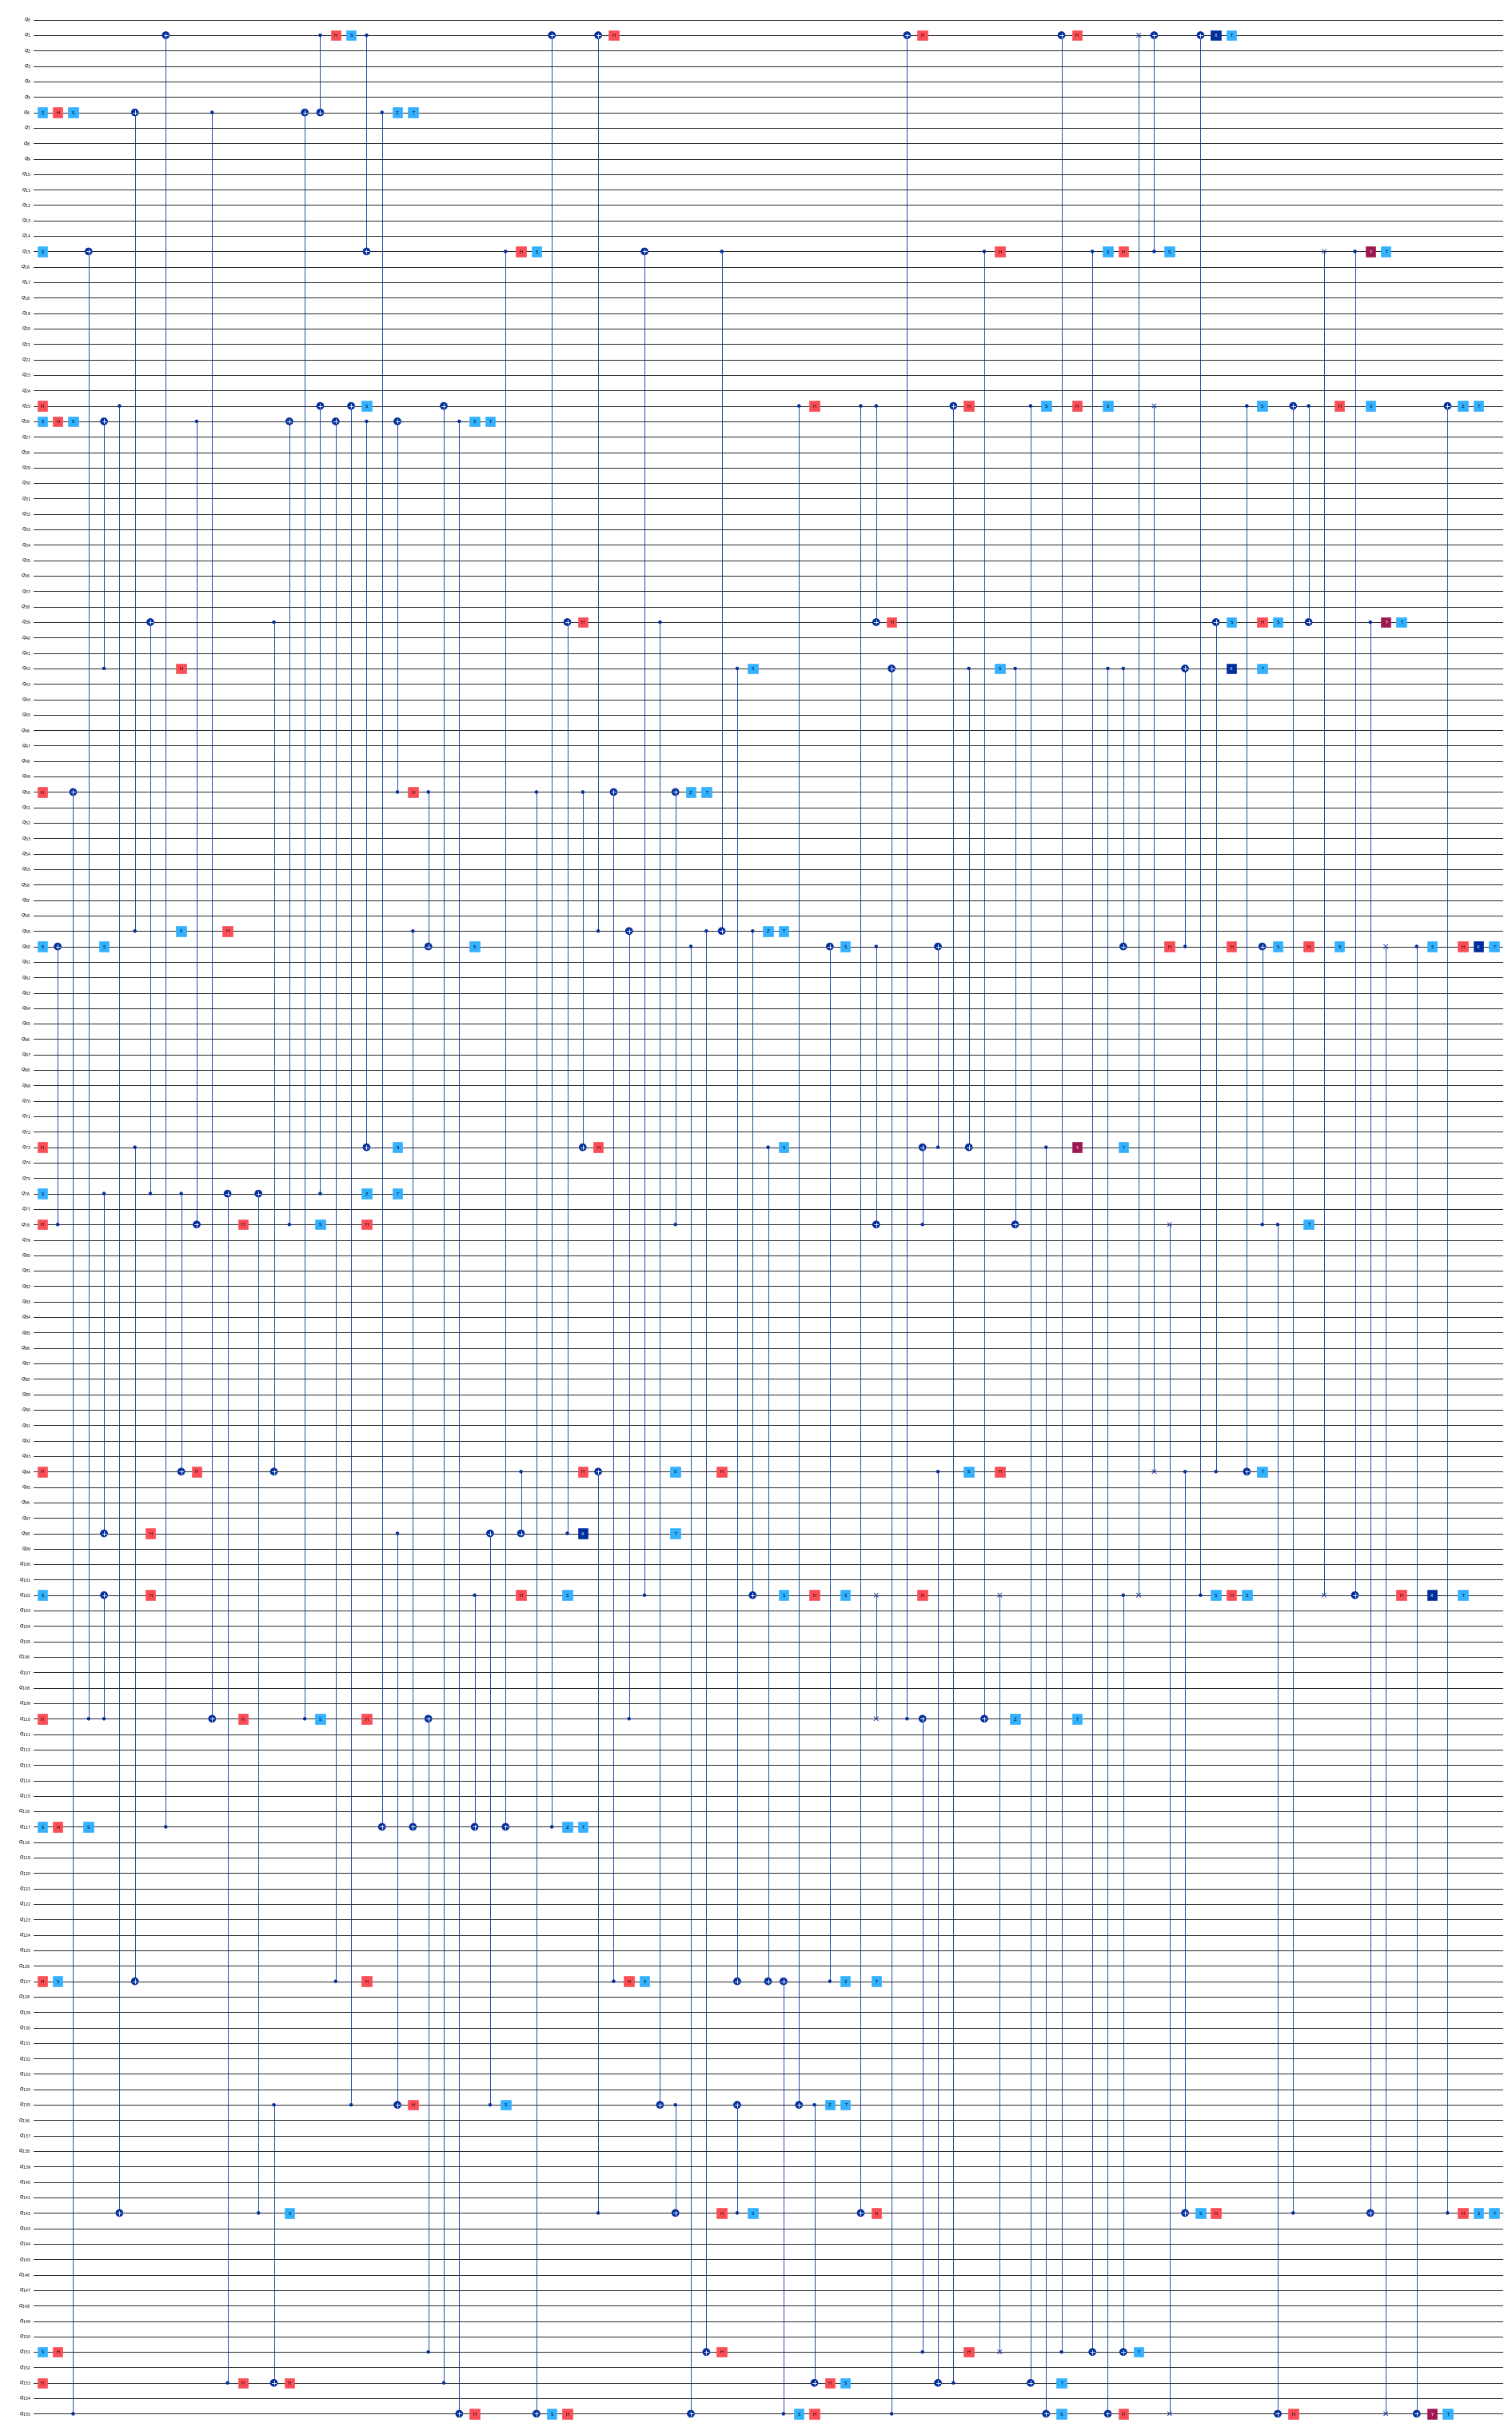

In [3]:
circuit = QuantumCircuit(backend.n_qubits)

for c in range(3):
    nq = 8
    qs = np.random.choice(range(circuit.num_qubits), size=nq, replace=False)
    circuit.compose(random_clifford(nq).to_circuit(), qubits=qs.tolist(), inplace=True)
    for q in qs:
        circuit.t(q)

print(
    f"Original circuit -> Depth: {circuit.decompose(reps=3).depth()}, Gates(2q): {circuit.decompose(reps=3).num_nonlocal_gates()}"
)
circuit.draw(output="mpl", fold=-1, scale=0.3, style="iqp")

## Transpiling the circuit with Qiskit

In [4]:
qiskit_lvl3_transpiler = generate_preset_pass_manager(
    optimization_level=3, coupling_map=fez_coupling_map
)

In [5]:
lvl3_transpiled_circuit = qiskit_lvl3_transpiler.run(circuit)

Transpiled circuit (Qiskit local level 3) -> Depth: 97, Gates(2q): 299


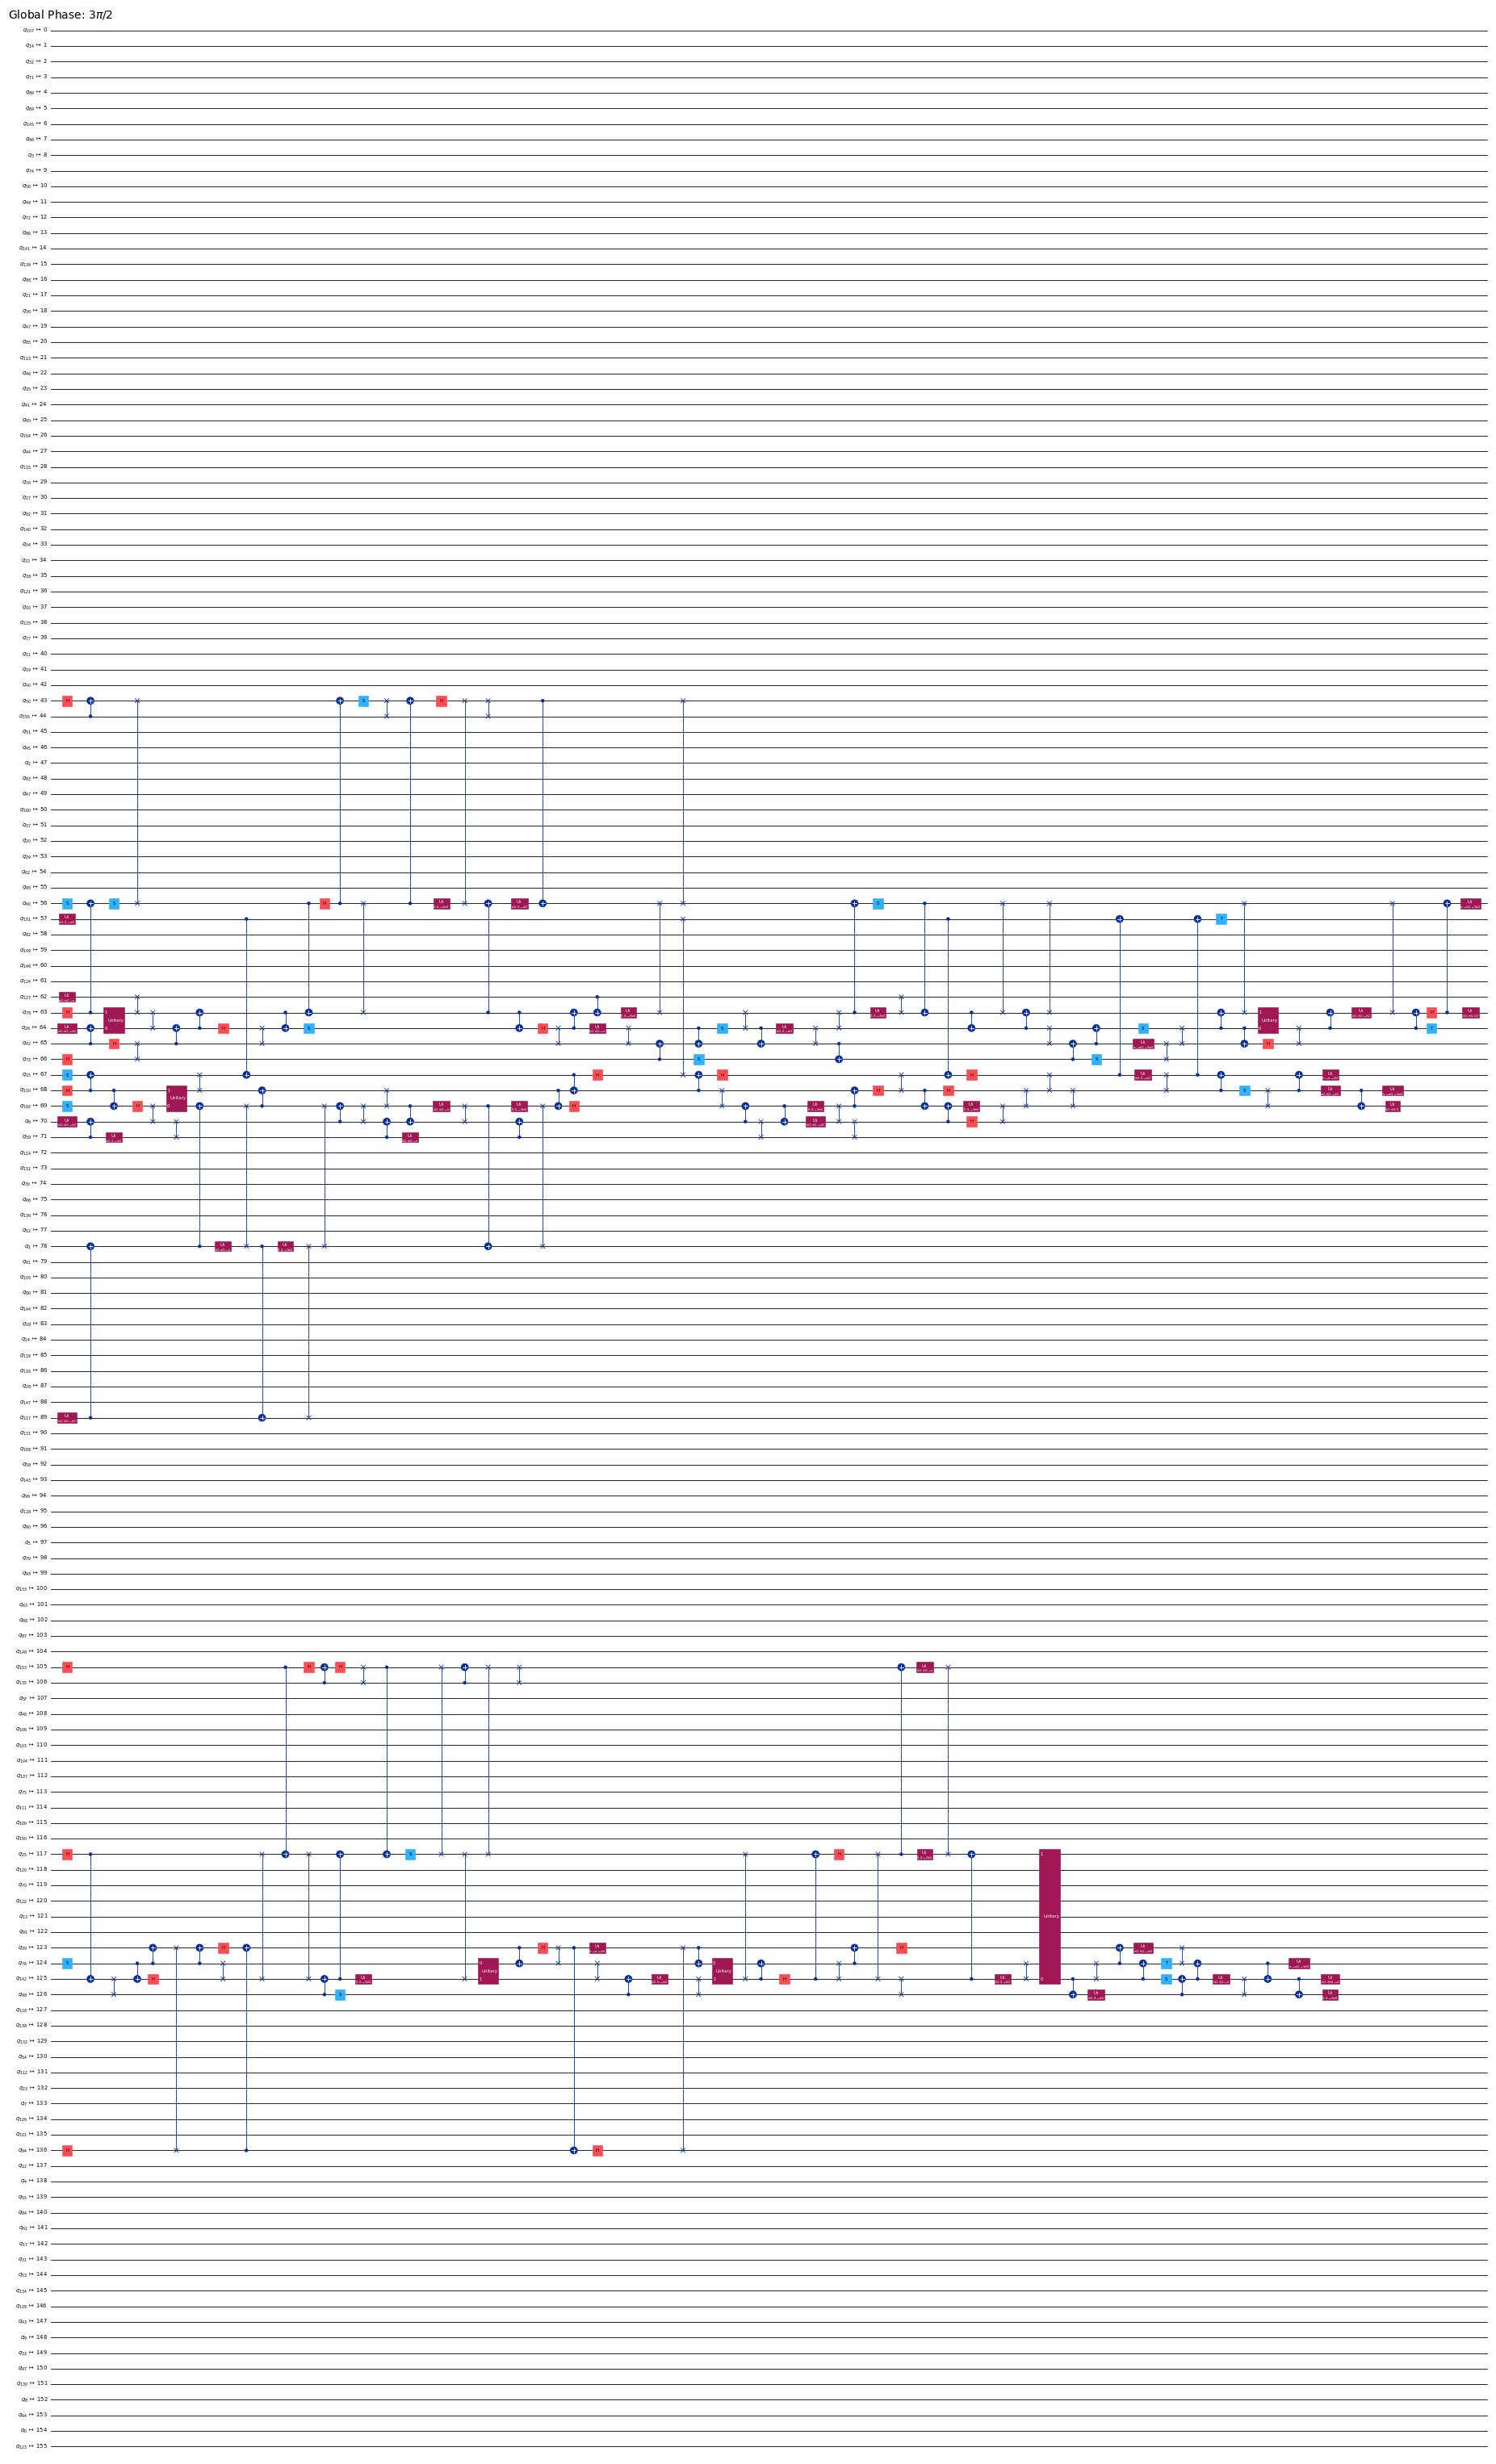

In [6]:
print(
    f"Transpiled circuit (Qiskit local level 3) -> Depth: {lvl3_transpiled_circuit.decompose(reps=3).depth()}, Gates(2q): {lvl3_transpiled_circuit.decompose(reps=3).num_nonlocal_gates()}"
)
lvl3_transpiled_circuit.draw(output="mpl", fold=-1, scale=0.3, style="iqp")

## Synthesizing the transpiled circuit locally

In [11]:
ai_linear_functions_synthesis_pass = PassManager(
    [
        CollectLinearFunctions(),
        AILinearFunctionSynthesis(coupling_map=fez_coupling_map),
    ]
)

synthesized_circuit_local = ai_linear_functions_synthesis_pass.run(
    lvl3_transpiled_circuit
)

INFO:qiskit_ibm_transpiler.wrappers.ai_local_linear_function_synthesis:Running Linear Functions AI synthesis on local mode
INFO:qiskit_ibm_transpiler.wrappers.ai_local_linear_function_synthesis:Running Linear Functions AI synthesis on local mode
INFO:qiskit_ibm_transpiler.wrappers.ai_local_linear_function_synthesis:Running Linear Functions AI synthesis on local mode
INFO:qiskit_ibm_transpiler.wrappers.ai_local_linear_function_synthesis:Running Linear Functions AI synthesis on local mode
INFO:qiskit_ibm_transpiler.wrappers.ai_local_linear_function_synthesis:Running Linear Functions AI synthesis on local mode
INFO:qiskit_ibm_transpiler.wrappers.ai_local_linear_function_synthesis:Running Linear Functions AI synthesis on local mode
INFO:qiskit_ibm_transpiler.wrappers.ai_local_linear_function_synthesis:Running Linear Functions AI synthesis on local mode
INFO:qiskit_ibm_transpiler.wrappers.ai_local_linear_function_synthesis:Running Linear Functions AI synthesis on local mode


Synthesized circuit (local AI) -> Depth: 89, Gates(2q): 283


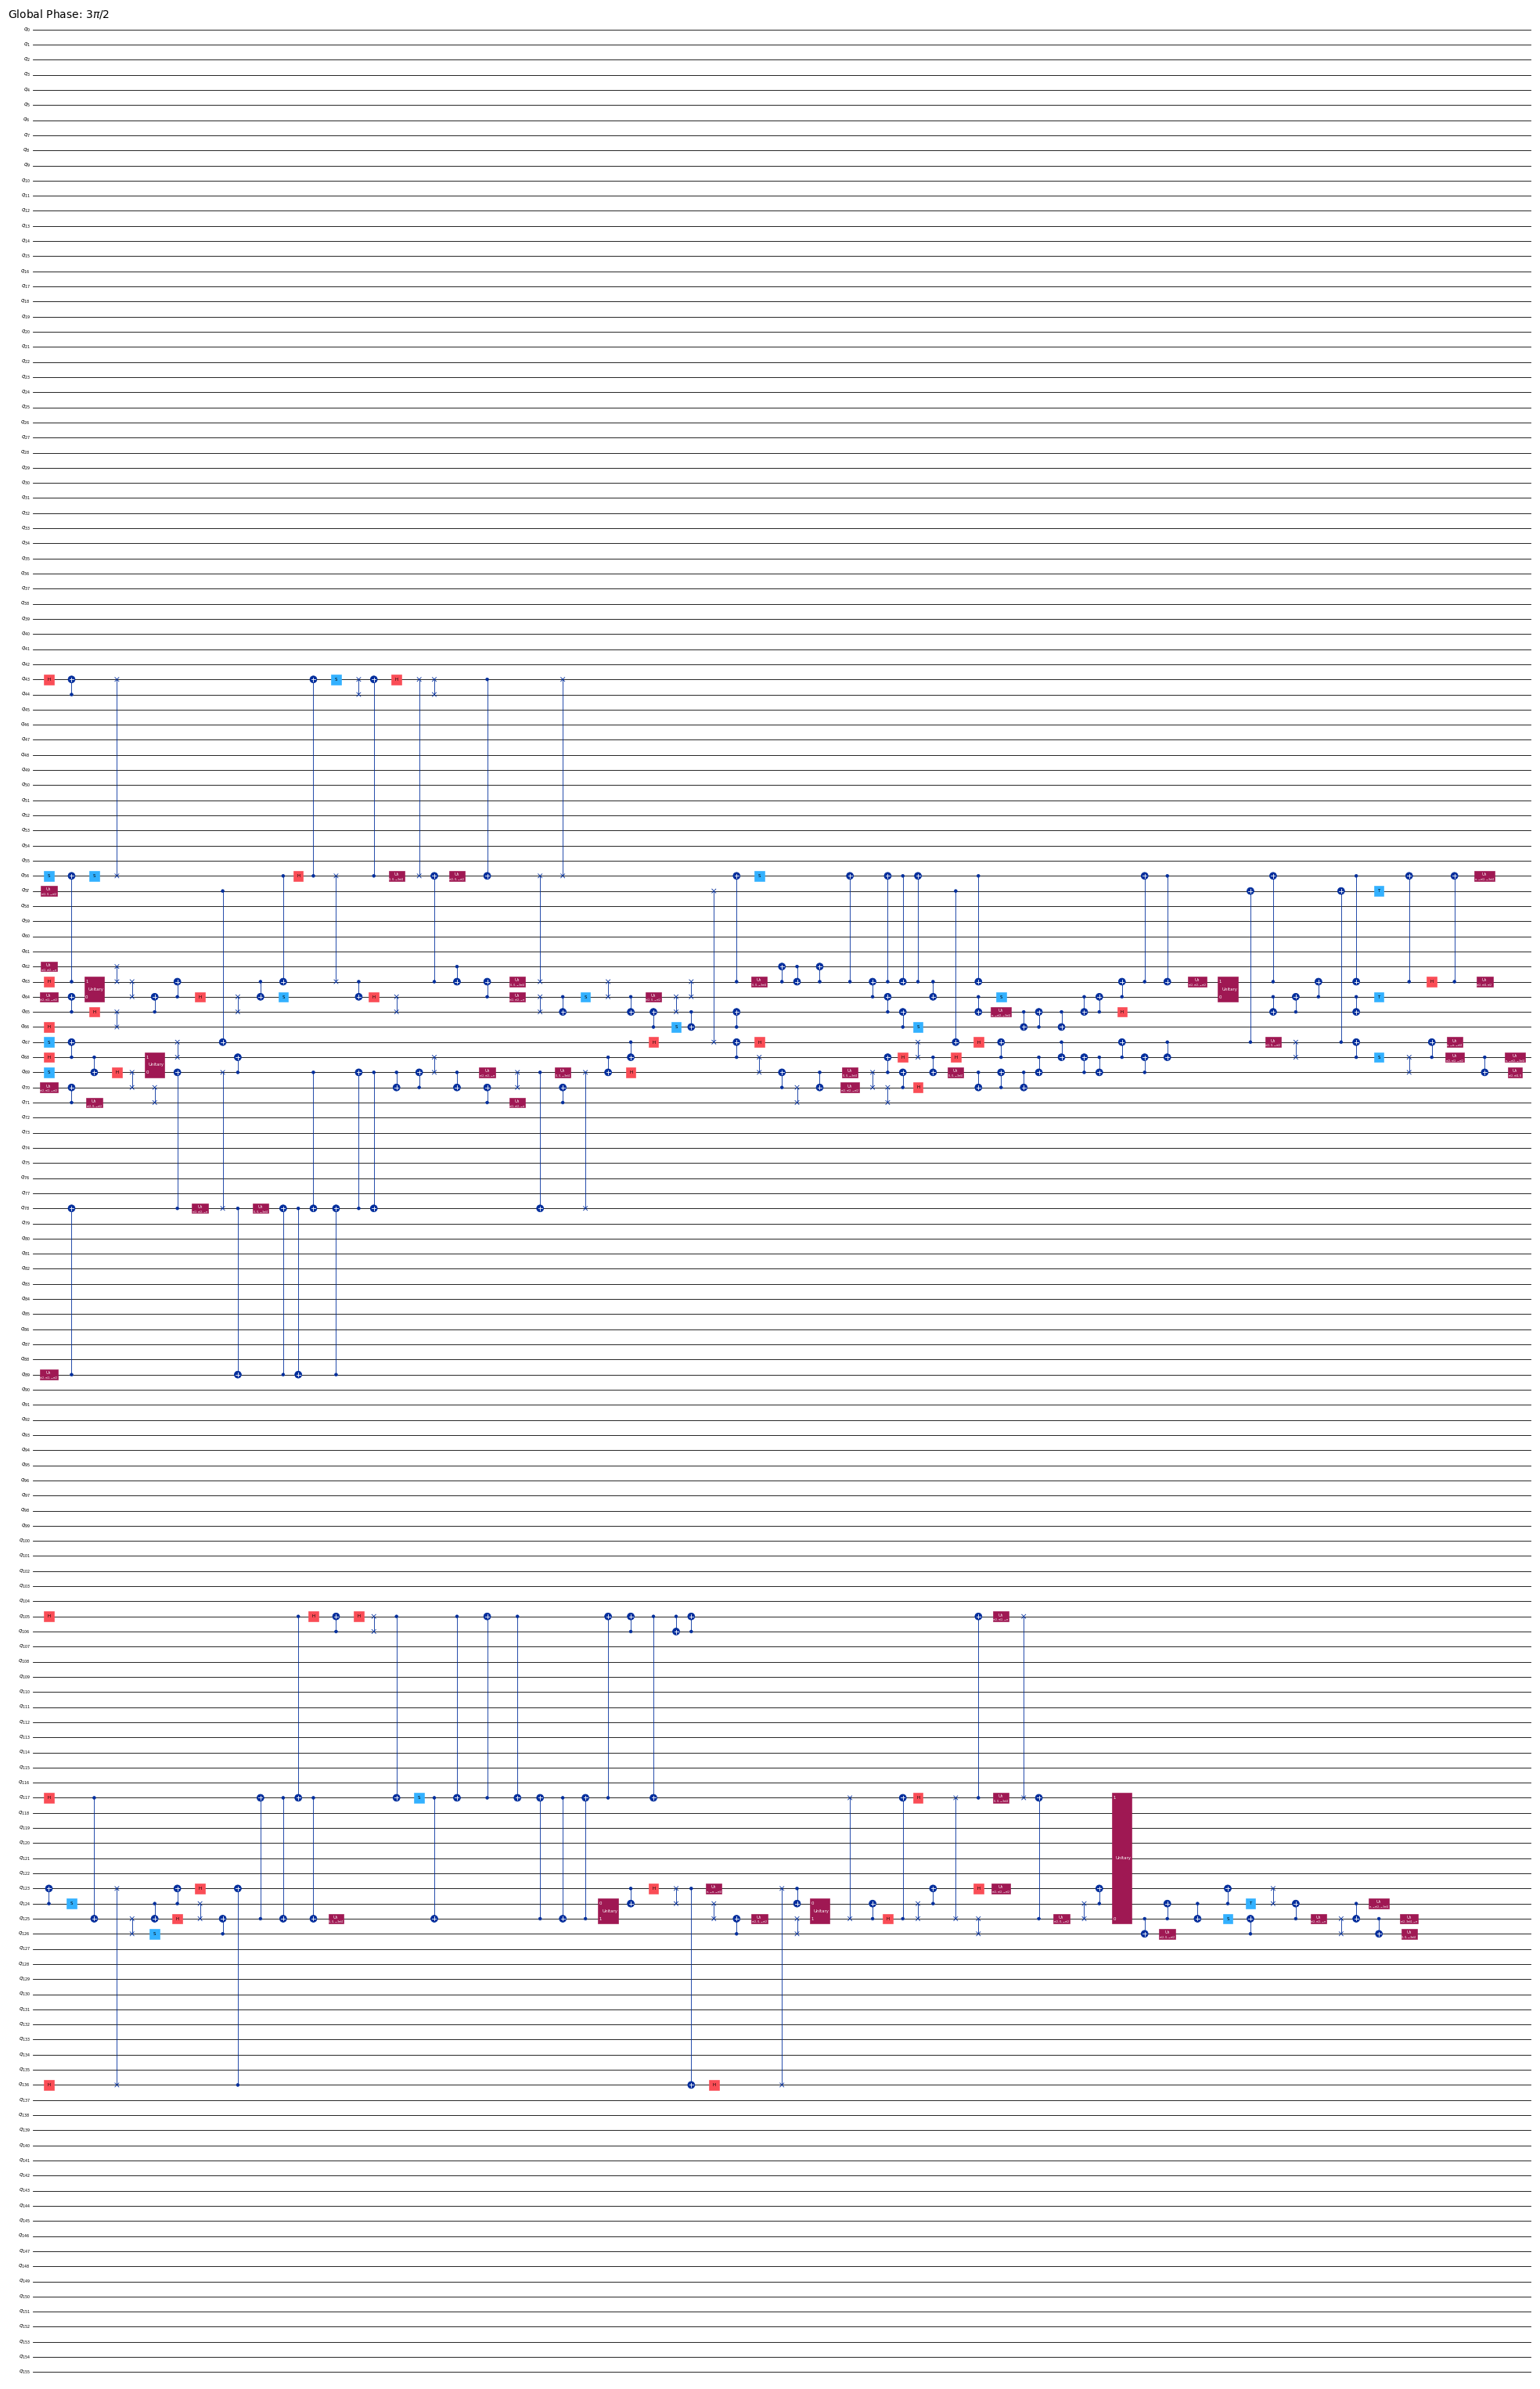

In [8]:
print(
    f"Synthesized circuit (local AI) -> Depth: {synthesized_circuit_local.decompose(reps=3).depth()}, Gates(2q): {synthesized_circuit_local.decompose(reps=3).num_nonlocal_gates()}"
)
synthesized_circuit_local.draw(output="mpl", fold=-1, scale=0.3, style="iqp")